# Example of using Networkx for Grouping

Sample code for using Networkx to identify related parties

Background:
There is a list of accounts / companies which you would like to identify related account / parties.

The assumptions that we will use for purpose of this example
- a related company is defined as 2 companies that shares a common director.
- The data in the tables are cleaned. 
- The data in the tables are provided in the followign format:
    | Company ID | Director ID |
    |---|---|
    | A | 1 |
    | B | 1 |


In [3]:
!pip install networkx

In [4]:
import networkx as nx

G = nx.Graph()

In [ ]:
import pandas as pd

# Prepare Data
data_dir = r'/Users/peterwirija/Documents/GenAI/Data/Co_Director.xlsx'
_co_id  = 'Company ID'
_director_id = 'Director ID'

df = pd.read_excel(data_dir)
df.rename(columns=lambda x: x.strip())

directors =  df[_director_id].unique().tolist()
companies = df[_co_id].unique().tolist()

## Add Account nodes 

In [17]:

director_list  = [(director, {'NodeType':'Director'}) for director in directors]
companies_list  = [(company, {'NodeType':'Company'}) for company in companies]
# Add Director nodes to graph
G.add_nodes_from (director_list)
G.add_nodes_from (companies_list)

In [24]:
# prepare edges
edges = list(zip(df[_co_id], df[_director_id]))
G.add_edges_from(edges)

In [28]:
G.nodes(data=True)

NodeDataView({19: {'NodeType': 'Director'}, 4: {'NodeType': 'Director'}, 18: {'NodeType': 'Director'}, 2: {'NodeType': 'Director'}, 6: {'NodeType': 'Director'}, 1: {'NodeType': 'Director'}, 11: {'NodeType': 'Director'}, 3: {'NodeType': 'Director'}, 20: {'NodeType': 'Director'}, 9: {'NodeType': 'Director'}, 8: {'NodeType': 'Director'}, 5: {'NodeType': 'Director'}, 15: {'NodeType': 'Director'}, 10: {'NodeType': 'Director'}, 17: {'NodeType': 'Director'}, 13: {'NodeType': 'Director'}, 14: {'NodeType': 'Director'}, 12: {'NodeType': 'Director'}, 16: {'NodeType': 'Director'}, 7: {'NodeType': 'Director'}, 'H': {'NodeType': 'Company'}, 'R': {'NodeType': 'Company'}, 'D': {'NodeType': 'Company'}, 'S': {'NodeType': 'Company'}, 'Y': {'NodeType': 'Company'}, 'P': {'NodeType': 'Company'}, 'X': {'NodeType': 'Company'}, 'O': {'NodeType': 'Company'}, 'L': {'NodeType': 'Company'}, 'W': {'NodeType': 'Company'}, 'M': {'NodeType': 'Company'}, 'B': {'NodeType': 'Company'}, 'J': {'NodeType': 'Company'}, 'A': 

ValueError: Received invalid argument(s): k

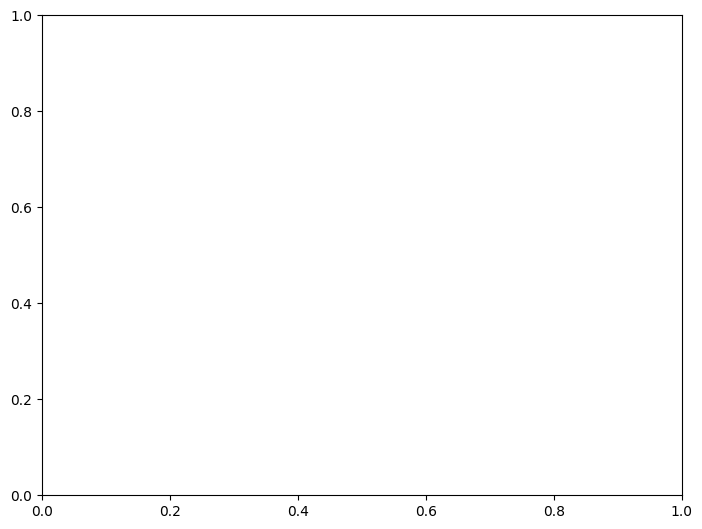

In [29]:
import matplotlib as plt
import numpy as np

color_map = {'Director': 'red', 'Company': 'blue'}

# no idea what this does
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
nx.draw(G, pos=pos, 
        with_labels=True, 
        k=13.8, 
        node_color=[color_map[node[1]['NodeType']] 
                    for node in G.nodes(data=True)], 
        node_size=800,
       font_color='white')
plt.show()